In [1]:
from utils.binaries import *
from utils.plotting import *

08:04:51 (   +1.5s) [INFO   ] -- import logging
08:04:51 (  +128ms) [INFO   ] -- import numpy as np
08:04:51 (    +5ms) [INFO   ] -- import uncertainties
08:04:51 (  +234ms) [INFO   ] -- import pandas as pd
08:04:51 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
08:04:51 (    +1ms) [INFO   ] -- import binaries.tools as tools
08:04:52 (  +321ms) [INFO   ] -- import matplotlib.pyplot as plt
08:04:52 (  +367ms) [INFO   ] -- import seaborn as so
08:04:52 (    +6ms) [DEBUG  ] -- font size set to 9.5
08:04:52 (    +1ms) [DEBUG  ] -- label size set to 13.0
08:04:52 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
08:04:52 (    +1ms) [DEBUG  ] -- markersize set to 2.0
08:04:52 (    +1ms) [DEBUG  ] -- usetex set to False
08:04:52 (    +2ms) [INFO   ] -- import plotting.tools as plot


[1.32+/-0.022967416847801105 1.980357142857143+/-0.05099364278127494
 1.2650000000000001+/-0.030642913215420862]


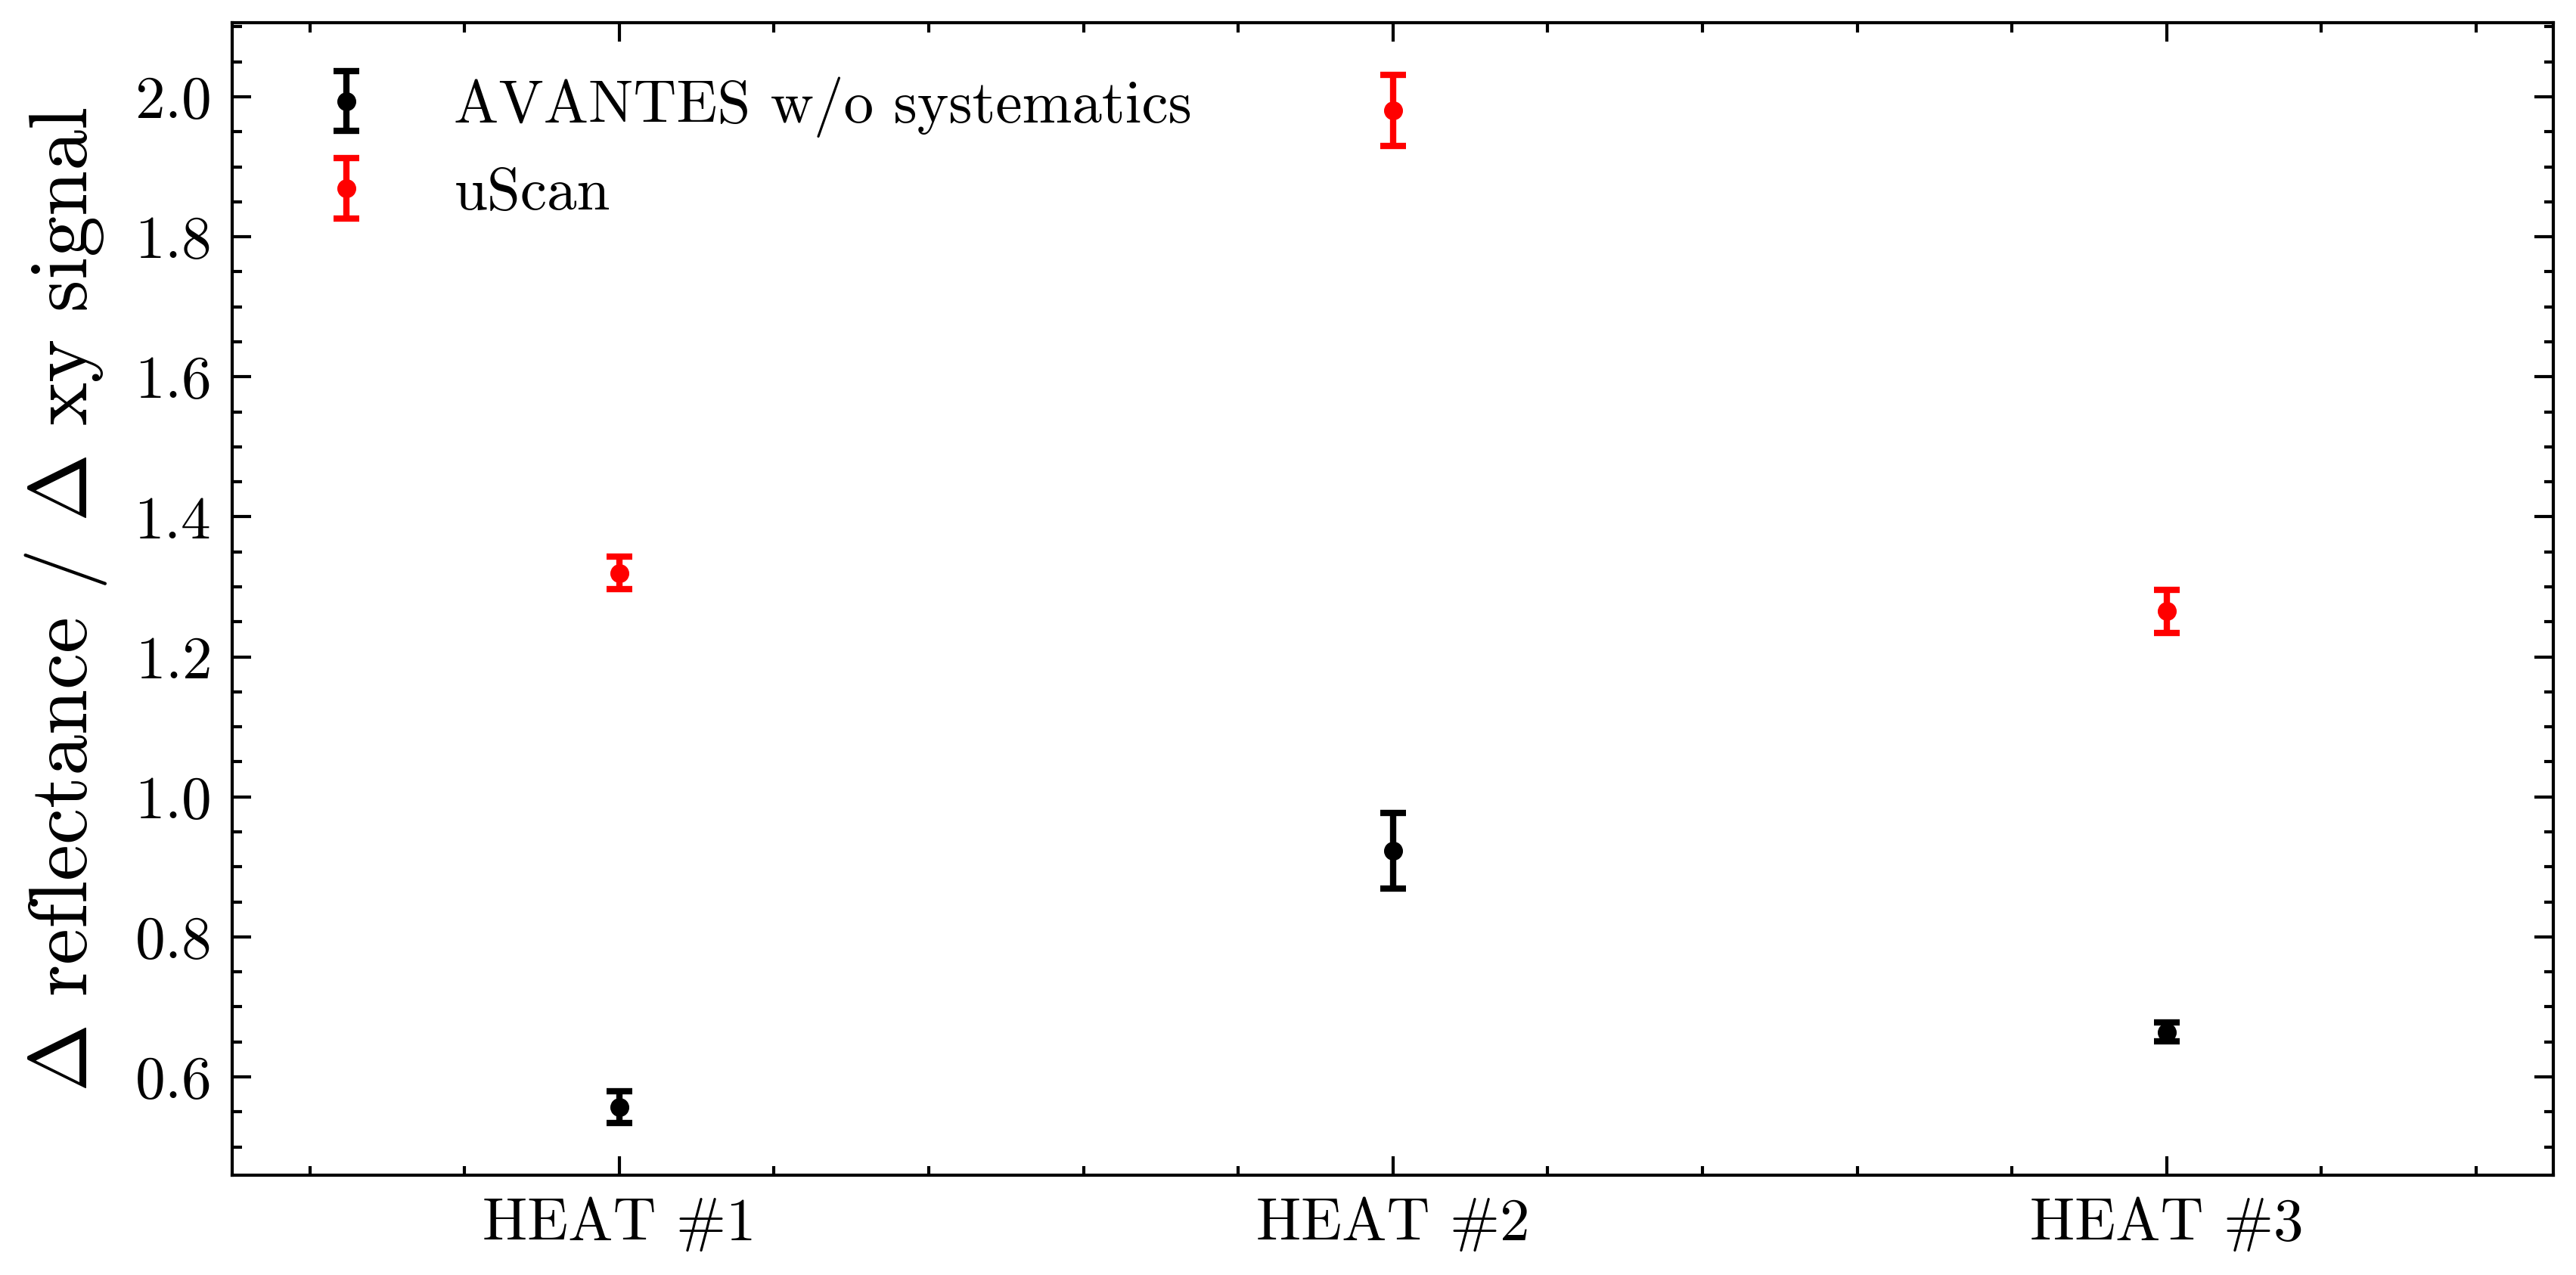

In [2]:
from uncertainties import unumpy

HEAT1_spec = np.array([27.8, 27.3, 21.3, 26.0, 19.4, 15.8, 12.6, 8.2])
HEAT2_spec = np.array([23.0, 15.7, 16.8, 16.2, 13.5, 9.5, 9.5, 6.7])
HEAT3_spec = np.array([35.5, 24.6, 23.1, 21.4, 17.5, 12.3, 11.5, 5.9])
HEAT1_hemi = np.array([14.6, 10.7, 9.0, 6.0, 7.5, 6.3, 6.7, 6.0])
HEAT2_hemi = np.array([10.7, 8.8, 9.0, 4.9, 4.9, 4.9, 4.3, 4.2])
HEAT3_hemi = np.array([14.2, 10.5, 10.1, 9.3, 11.0, 9.3, 8.8, 6.5])	

Heat_spec = np.array([HEAT1_spec, HEAT2_spec, HEAT3_spec])
Heat_hemi = np.array([HEAT1_hemi, HEAT2_hemi, HEAT3_hemi])
spec_err = Heat_spec.std(axis=1) / Heat_spec.mean(axis=1)
hemi_err = Heat_hemi.std(axis=1) / Heat_hemi.mean(axis=1)
specular = unumpy.uarray(Heat_spec.mean(axis=1), spec_err)
hemispherical = unumpy.uarray(Heat_hemi.mean(axis=1), hemi_err)

xy_signal = unumpy.uarray([15, 7, 15], [0.04, 0.03, 0.04])
spec_ratio = specular / xy_signal
hemi_ratio = hemispherical / xy_signal



print(spec_ratio)

plt.errorbar(range(1, 4), unumpy.nominal_values(hemi_ratio), unumpy.std_devs(hemi_ratio), fmt='o', capsize=2, label='AVANTES w/o systematics')
plt.errorbar(range(1, 4), unumpy.nominal_values(spec_ratio), unumpy.std_devs(spec_ratio), fmt='o', capsize=2, label='uScan')

plt.xticks([1, 2, 3], ['HEAT #1', 'HEAT #2', 'HEAT #3'])

plt.ylabel('$\Delta$ reflectance / $\Delta$ xy signal')
plt.xlim(0.5, 3.5)
plt.legend(loc=2)

plot.save(path='XY-heat/reflectivity-comparison')